In [ ]:
%matplotlib inline
from vic.dataloader import load_orl, make_fixed_test_indices, split_with_fixed_test
from vic.models import LBPH
from vic.metrics import get_metrics_vs_train_size, get_average_acc_vs_train_size
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

In [16]:
data = load_orl("../data/ORL")

In [17]:
model = LBPH()
train_sizes = np.arange(1, 8)
accuracy_scores, conf_matrices = get_metrics_vs_train_size(model, train_sizes, data)

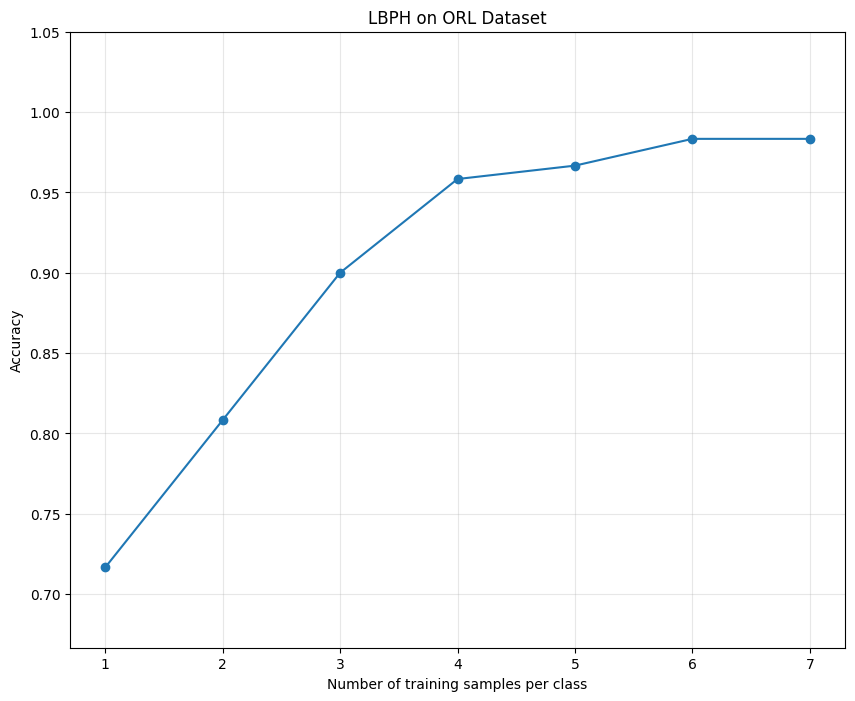

In [18]:
fig = plt.figure(figsize=(10, 8))
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("LBPH on ORL Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()

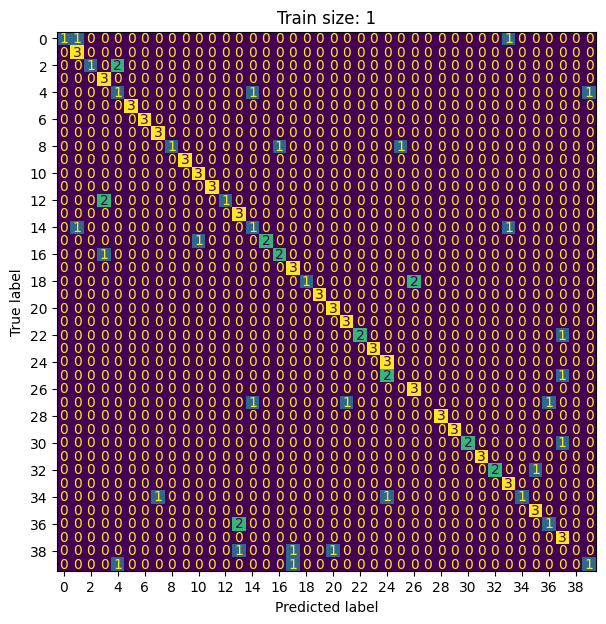

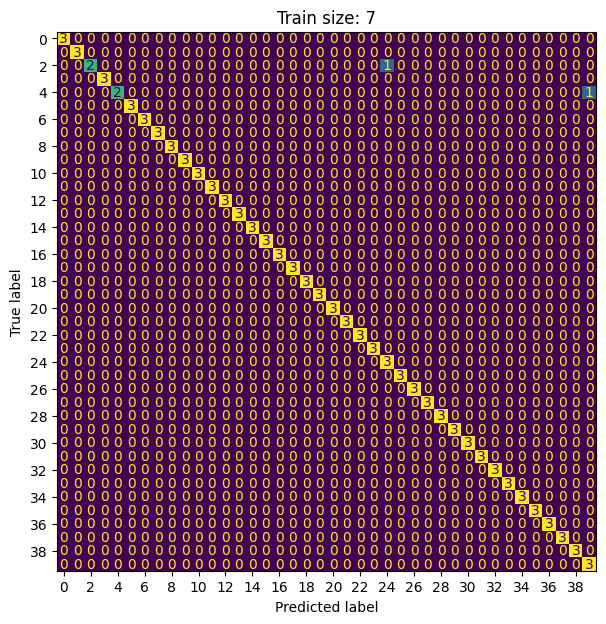

In [19]:
sizes_to_plot = [1, 7]

for i, size in enumerate(sizes_to_plot):
    cm = conf_matrices[size]

    fig, ax = plt.subplots(figsize=(7, 7))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(colorbar=False, ax=ax)

    ax.set_xticks(np.arange(0, 40, 2))
    ax.set_yticks(np.arange(0, 40, 2))

    plt.title(f"Train size: {size}")
    plt.show()

In [14]:
n_exp = 3
mean_scores, std_scores = get_average_acc_vs_train_size(
    model, train_sizes, data, n_exp=n_exp
)

Experiments: 100%|██████████| 3/3 [14:53<00:00, 297.84s/it]


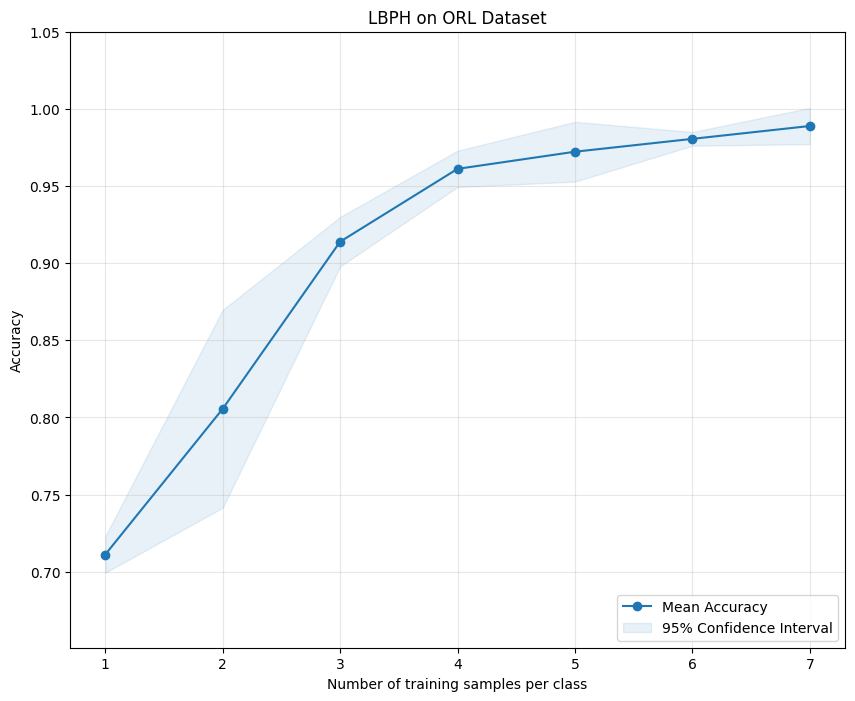

In [21]:
n_exp = 3
sorted_sizes = sorted(mean_scores.keys())
means = np.array([mean_scores[k] for k in sorted_sizes])
stds = np.array([std_scores[k] for k in sorted_sizes])
ci = 1.96 * stds / np.sqrt(n_exp)

fig = plt.figure(figsize=(10, 8))

plt.plot(sorted_sizes, means, marker="o", color="tab:blue", label="Mean Accuracy")

plt.fill_between(
    sorted_sizes,
    means - ci,
    means + ci,
    alpha=0.1,
    color="tab:blue",
    label="95% Confidence Interval",
)

plt.title("LBPH on ORL Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")

plt.xticks(sorted_sizes)

plt.grid(True, alpha=0.3)
plt.legend(loc="lower right")

y_min = max(0, min(means - stds) - 0.05)
plt.ylim(y_min, 1.05)

plt.show()